In [167]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import io
import joblib


In [168]:
!pip install -U -q PyDrive
!pip install joblib

In [169]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [170]:
file_list = drive.ListFile({'q': "'1yZd6QgVYytNv6Ng4J0InfK4naGxjOA79' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: gender_predict.ipynb, id: 1NnNwyy5OsH4rtzqoOT1EIKpCmbhP4gbx
title: Untitled0.ipynb, id: 1Eo5x-_GM6KyYWNA5n-ZBi1R1G7_xB4f5
title: Boy_or_girl_test_no_solution 2022.csv, id: 1yCgmcL5wWHx_haeGhstdjK6xZgJgs348
title: DS_Assignment2_M_or_F (1).ipynb, id: 1Zd6dezJyiZVPWotwnRWYkOVKaBeNK1oQ
title: Boy_or_girl_train 2022.csv, id: 1SQ6gAxtjPGg0ebJbC4kjSmyuOhfATYlD


In [171]:
csv_from_gdrive = drive.CreateFile({'id': '1SQ6gAxtjPGg0ebJbC4kjSmyuOhfATYlD'})
csv_from_gdrive.GetContentFile('data.csv')

In [172]:
df = pd.read_csv('data.csv')

In [173]:
df[0:10]

,id,timestamp,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro
0,1,4/7/2017 13:47,2,處女座,Apple,154.0,43.0,2,180.0,583.0,0,Beautiful
1,2,4/7/2017 13:48,2,處女座,Apple,156.0,47.0,2,130.0,400.0,3.5,Enjoying being who I'm notsss
2,3,4/7/2017 13:49,1,射手座,Android,170.0,61.0,3,90.0,540.0,5,Practice Makes perfect
3,4,4/7/2017 13:49,1,射手座,Apple,170.0,62.0,4,100.0,173.0,5,Straightforward
4,5,4/7/2017 13:54,2,射手座,Android,158.0,67.0,3,128.0,320.0,1.2,Humorous
5,6,4/7/2017 13:55,2,摩羯座,Android,158.0,50.0,3,100.0,903.0,2,I am cute
6,7,4/7/2017 13:56,1,天秤座,Android,165.0,50.0,4,115.0,209.0,9.59,Homo sapiens
7,8,4/7/2017 13:56,2,雙子座,Android,170.0,57.0,4,100.0,1200.0,NaN,Um..Haha
8,9,4/7/2017 13:57,2,射手座,Android,168.0,52.0,2,100.0,580.0,5.34,I am quite.
9,10,4/7/2017 14:00,2,牡羊座,Apple,165.0,55.0,5,130.0,542.0,2,Beautiful


In [174]:
# lowercase string
df['phone_os'] = df['phone_os'].str.lower()
# removing leading and trailing whitespaces
df['phone_os'] = df['phone_os'].str.strip()

coded_star_signs = {'水瓶座':1, '雙魚座':2, '牡羊座':3, '金牛座':4, '雙子座':5, '巨蟹座':6, '獅子座':7, '處女座':8, '天秤座':9, '天蠍座':10, '射手座':11, '摩羯座':12}
coded_phone_os = {'apple':1, 'android':2, 'windows phone':3, 'johncena':4}
coded_gender = {2:-1} #girls as -1

coded_df = df.replace({"star_sign": coded_star_signs})
coded_df = coded_df.replace({"phone_os": coded_phone_os})
coded_df = coded_df.replace({"gender": coded_gender})

coded_df[0:10]

,id,timestamp,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro
0,1,4/7/2017 13:47,-1,8,1,154.0,43.0,2,180.0,583.0,0,Beautiful
1,2,4/7/2017 13:48,-1,8,1,156.0,47.0,2,130.0,400.0,3.5,Enjoying being who I'm notsss
2,3,4/7/2017 13:49,1,11,2,170.0,61.0,3,90.0,540.0,5,Practice Makes perfect
3,4,4/7/2017 13:49,1,11,1,170.0,62.0,4,100.0,173.0,5,Straightforward
4,5,4/7/2017 13:54,-1,11,2,158.0,67.0,3,128.0,320.0,1.2,Humorous
5,6,4/7/2017 13:55,-1,12,2,158.0,50.0,3,100.0,903.0,2,I am cute
6,7,4/7/2017 13:56,1,9,2,165.0,50.0,4,115.0,209.0,9.59,Homo sapiens
7,8,4/7/2017 13:56,-1,5,2,170.0,57.0,4,100.0,1200.0,NaN,Um..Haha
8,9,4/7/2017 13:57,-1,11,2,168.0,52.0,2,100.0,580.0,5.34,I am quite.
9,10,4/7/2017 14:00,-1,3,1,165.0,55.0,5,130.0,542.0,2,Beautiful


In [175]:
coded_df.isnull().any()

id            False
timestamp     False
gender        False
star_sign     False
phone_os      False
height        False
weight        False
sleepiness    False
iq             True
fb_friends    False
yt             True
self_intro    False
dtype: bool

In [176]:
coded_df[coded_df['yt'].isnull()]

,id,timestamp,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro
7,8,4/7/2017 13:56,-1,5,2,170.0,57.0,4,100.0,1200.0,NaN,Um..Haha
22,23,4/7/2017 13:56,-1,5,2,170.0,57.0,4,100.0,1200.0,NaN,Um..Haha


In [177]:
coded_df[coded_df['iq'].isnull()]

,id,timestamp,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro
20,21,4/7/2017 13:55,-1,12,2,158.0,50.0,3,NaN,903.0,2,I am cute
23,24,4/7/2017 13:57,-1,11,2,168.0,52.0,2,NaN,580.0,5.34,I am quite.


In [178]:
nan_rows = lambda df: df[df.isnull().any(axis=1)]
nan_rows(coded_df)

,id,timestamp,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro
7,8,4/7/2017 13:56,-1,5,2,170.0,57.0,4,100.0,1200.0,NaN,Um..Haha
20,21,4/7/2017 13:55,-1,12,2,158.0,50.0,3,NaN,903.0,2,I am cute
22,23,4/7/2017 13:56,-1,5,2,170.0,57.0,4,100.0,1200.0,NaN,Um..Haha
23,24,4/7/2017 13:57,-1,11,2,168.0,52.0,2,NaN,580.0,5.34,I am quite.


In [179]:
cleaned_df = coded_df.dropna()

In [180]:
cleaned_df = cleaned_df[(cleaned_df['height']<200) & (cleaned_df['height']>140) & (cleaned_df['weight']<200) & (cleaned_df['height']>100) & (cleaned_df['fb_friends']<=5000)]

In [181]:
cleaned_df.describe()

,id,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,242.792793,0.495495,6.515766,1.545045,170.346779,64.387095,3.409910,125.538288,500.621622
std,138.624059,0.869590,3.479346,0.498529,8.118840,14.430934,1.191956,36.492875,480.195794
min,1.000000,-1.000000,1.000000,1.000000,147.000000,7.000000,1.000000,50.000000,0.000000
25%,123.750000,-1.000000,3.000000,1.000000,165.000000,55.000000,3.000000,100.000000,200.000000
50%,238.500000,1.000000,7.000000,2.000000,171.000000,63.000000,3.000000,120.000000,400.000000
75%,364.250000,1.000000,9.000000,2.000000,176.000000,71.250000,4.000000,145.250000,626.750000
max,481.000000,1.000000,12.000000,2.000000,190.000000,187.000000,5.000000,200.000000,5000.000000


In [182]:
cleaned_df['BMI']=cleaned_df['weight']/((cleaned_df['height']/100)*(cleaned_df['height']/100))
cleaned_df[0:10]

,id,timestamp,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro,BMI
0,1,4/7/2017 13:47,-1,8,1,154.0,43.0,2,180.0,583.0,0,Beautiful,18.131219
1,2,4/7/2017 13:48,-1,8,1,156.0,47.0,2,130.0,400.0,3.5,Enjoying being who I'm notsss,19.312952
2,3,4/7/2017 13:49,1,11,2,170.0,61.0,3,90.0,540.0,5,Practice Makes perfect,21.107266
3,4,4/7/2017 13:49,1,11,1,170.0,62.0,4,100.0,173.0,5,Straightforward,21.453287
4,5,4/7/2017 13:54,-1,11,2,158.0,67.0,3,128.0,320.0,1.2,Humorous,26.838648
5,6,4/7/2017 13:55,-1,12,2,158.0,50.0,3,100.0,903.0,2,I am cute,20.028842
6,7,4/7/2017 13:56,1,9,2,165.0,50.0,4,115.0,209.0,9.59,Homo sapiens,18.365473
8,9,4/7/2017 13:57,-1,11,2,168.0,52.0,2,100.0,580.0,5.34,I am quite.,18.424036
9,10,4/7/2017 14:00,-1,3,1,165.0,55.0,5,130.0,542.0,2,Beautiful,20.202020
10,11,4/7/2017 14:01,-1,9,2,164.0,52.0,3,180.0,300.0,1,Beautiful and smart,19.333730


In [183]:
from sklearn.model_selection import train_test_split

y = cleaned_df.pop('gender') # this is our target label
X = cleaned_df # this is our 'data'


In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [185]:
numeric_X_train = X_train.drop(columns=['id','timestamp','self_intro','yt'])
numeric_X_test = X_test.drop(columns=['id','timestamp','self_intro','yt'])

numeric_X_train.shape

(355, 8)

In [186]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SVMSMOTE
#X_res, y_res=SVMSMOTE().fit_resample(numeric_X_train, y_train)
X_res, y_res = BorderlineSMOTE(random_state=42).fit_resample(numeric_X_train, y_train)
X_res.shape


(546, 8)

In [187]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)
clf.fit(X_res, y_res)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(random_state=0)

In [188]:
joblib.dump(clf,'svc.joblib')
model=joblib.load('svc.joblib')

In [189]:
predicted_ans = clf.predict(numeric_X_test)
#predicted_ans = model.predict(numeric_X_test)
predicted_ans


array([-1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,
       -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1])

In [190]:
from collections import Counter
print(Counter(predicted_ans))


Counter({1: 67, -1: 22})


Average precision-recall score: 0.88


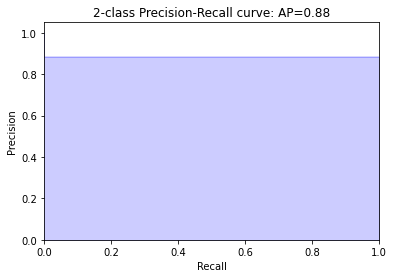

In [191]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, predicted_ans)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, predicted_ans)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()
#0.8

In [192]:
from sklearn.tree import DecisionTreeClassifier as dtree, export_graphviz
# initiate a Decision Tree with default parameters
dt = dtree()

# train a DT classifier with the training data
dt.fit(X_res, y_res)


DecisionTreeClassifier()

In [193]:
predicted_ans = dt.predict(numeric_X_test)
predicted_ans 

array([-1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1,
        1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
       -1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,
       -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
        1,  1,  1,  1])

Average precision-recall score: 0.90


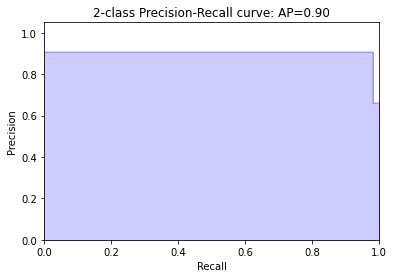

In [194]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, predicted_ans)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, predicted_ans)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()
#0.93

In [195]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression().fit(X_res, y_res)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [196]:
predicted_ans = lr.predict(numeric_X_test)

Average precision-recall score: 0.89


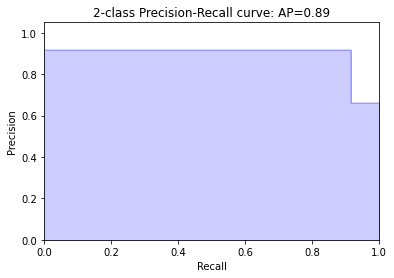

In [197]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, predicted_ans)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, predicted_ans)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()
#0.74

testdata-preprocess

In [198]:
#test data
csv_from_gdrive = drive.CreateFile({'id': '1yCgmcL5wWHx_haeGhstdjK6xZgJgs348'})
csv_from_gdrive.GetContentFile('test.csv')
dftest = pd.read_csv('test.csv')
dftest[0:10]

,id,timestamp,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro
0,1,10/9/2018 10:12,0,摩羯座,Android,174.0,76.5,3,120,555.0,0.0,I am alive.
1,2,10/9/2018 10:13,0,雙子座,Apple,178.0,85.0,3,120,653.0,30.8,Fuck off
2,3,10/9/2018 10:13,0,射手座,Apple,178.0,45.0,4,200,500.0,1.0,Good
3,4,10/9/2018 10:13,0,天蠍座,Android,170.0,1.0,4,50,1.0,5000.0,Reallll sheet
4,5,10/9/2018 10:13,0,處女座,Apple,175.0,65.0,5,120,572.0,3.0,Fabulous.
5,6,10/9/2018 10:13,0,巨蟹座,Android,175.0,73.0,4,120,200.0,3.0,handsome
6,7,10/9/2018 10:13,0,處女座,Apple,166.0,90.0,1,170,20000.0,0.0,ass
7,8,10/9/2018 10:13,0,天蠍座,Android,162.0,50.0,5,120,115.0,20.0,I am smart
8,9,10/9/2018 10:13,0,處女座,Apple,175.0,70.0,4,180,1186.0,50.0,Cool and smart
9,10,10/9/2018 10:13,0,牡羊座,Android,160.0,50.0,4,180,100.0,3.0,Normal


In [199]:
# lowercase string
dftest['phone_os'] = dftest['phone_os'].str.lower()
# removing leading and trailing whitespaces
dftest['phone_os'] = dftest['phone_os'].str.strip()

coded_star_signs = {'水瓶座':1, '雙魚座':2, '牡羊座':3, '金牛座':4, '雙子座':5, '巨蟹座':6, '獅子座':7, '處女座':8, '天秤座':9, '天蠍座':10, '射手座':11, '摩羯座':12}
coded_phone_os = {'apple':1, 'android':2, 'windows phone':3, 'johncena':4}
coded_gender = {2:-1} #girls as -1

coded_dftest = dftest.replace({"star_sign": coded_star_signs})
coded_dftest = coded_dftest.replace({"phone_os": coded_phone_os})
coded_dftest = coded_dftest.replace({"gender": coded_gender})

coded_dftest[0:10]

,id,timestamp,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro
0,1,10/9/2018 10:12,0,12,2,174.0,76.5,3,120,555.0,0.0,I am alive.
1,2,10/9/2018 10:13,0,5,1,178.0,85.0,3,120,653.0,30.8,Fuck off
2,3,10/9/2018 10:13,0,11,1,178.0,45.0,4,200,500.0,1.0,Good
3,4,10/9/2018 10:13,0,10,2,170.0,1.0,4,50,1.0,5000.0,Reallll sheet
4,5,10/9/2018 10:13,0,8,1,175.0,65.0,5,120,572.0,3.0,Fabulous.
5,6,10/9/2018 10:13,0,6,2,175.0,73.0,4,120,200.0,3.0,handsome
6,7,10/9/2018 10:13,0,8,1,166.0,90.0,1,170,20000.0,0.0,ass
7,8,10/9/2018 10:13,0,10,2,162.0,50.0,5,120,115.0,20.0,I am smart
8,9,10/9/2018 10:13,0,8,1,175.0,70.0,4,180,1186.0,50.0,Cool and smart
9,10,10/9/2018 10:13,0,3,2,160.0,50.0,4,180,100.0,3.0,Normal


In [200]:
coded_dftest.isnull().any()

id            False
timestamp     False
gender        False
star_sign     False
phone_os      False
height        False
weight        False
sleepiness    False
iq            False
fb_friends    False
yt            False
self_intro     True
dtype: bool

In [201]:
coded_dftest=coded_dftest.drop(columns=['timestamp','self_intro','gender','yt','id'])

In [202]:
coded_dftest.describe()

,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends
count,252.000000,252.000000,2.520000e+02,2.520000e+02,252.000000,252.000000,2.520000e+02
mean,5.944444,1.384921,7.301587e+18,7.301587e+27,3.412698,128.444444,3.968254e+95
std,3.309543,0.487545,1.159091e+20,1.159091e+29,1.289058,44.039652,6.299408e+96
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000,50.000000,0.000000e+00
25%,3.000000,1.000000,1.630000e+02,5.300000e+01,2.000000,100.000000,1.732500e+02
50%,6.000000,1.000000,1.700000e+02,6.300000e+01,4.000000,120.000000,3.925000e+02
75%,9.000000,2.000000,1.752500e+02,7.500000e+01,4.000000,180.000000,6.660000e+02
max,12.000000,2.000000,1.840000e+21,1.840000e+30,5.000000,200.000000,1.000000e+98


In [203]:
cleaned_dftest = coded_dftest[(coded_dftest['height']<200) & (coded_dftest['height']>140) & (coded_dftest['weight']<200) & (coded_dftest['weight']>30) & (coded_dftest['fb_friends']<=5000)]



In [204]:
cleaned_dftest['BMI']=cleaned_dftest['weight']/((cleaned_dftest['height']/100)*(cleaned_dftest['height']/100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [205]:
cleaned_dftest.describe()

,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,BMI
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000
mean,5.896552,1.387931,169.662931,64.465517,3.495690,127.491379,479.844828,22.224310
std,3.315657,0.488332,8.809696,14.481698,1.237921,41.940898,427.311369,3.840359
min,1.000000,1.000000,150.000000,37.000000,1.000000,50.000000,0.000000,12.220901
25%,3.000000,1.000000,163.000000,53.000000,3.000000,100.000000,200.000000,19.355217
50%,6.000000,1.000000,170.000000,63.000000,4.000000,120.000000,392.500000,21.739486
75%,8.000000,2.000000,175.000000,75.000000,4.000000,161.500000,653.000000,24.299871
max,12.000000,2.000000,193.000000,113.000000,5.000000,200.000000,3000.000000,37.756023


In [206]:
cleaned_dftest


,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,BMI
0,12,2,174.0,76.5,3,120,555.0,25.267539
1,5,1,178.0,85.0,3,120,653.0,26.827421
2,11,1,178.0,45.0,4,200,500.0,14.202752
4,8,1,175.0,65.0,5,120,572.0,21.224490
5,6,2,175.0,73.0,4,120,200.0,23.836735
...,...,...,...,...,...,...,...,...
246,11,1,179.0,60.0,2,85,60.0,18.726007
247,3,1,176.0,111.0,4,100,382.0,35.834194
248,1,2,174.0,90.0,4,110,289.0,29.726516
250,2,2,150.0,50.0,2,140,1100.0,22.222222


In [207]:
predicted_ans = dt.predict(cleaned_dftest)
predicted_ans

array([ 1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1,
        1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1,
        1, -1,  1, -1, -1

In [208]:
print(Counter(predicted_ans))

Counter({1: 162, -1: 70})


In [209]:
predicted_ans = clf.predict(cleaned_dftest)
predicted_ans

array([ 1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,
        1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1,
        1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
        1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1,
        1, -1, -1, -1, -1

In [210]:
print(Counter(predicted_ans))

Counter({1: 156, -1: 76})


In [211]:
predicted_ans = lr.predict(cleaned_dftest)
predicted_ans

array([ 1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,
        1,  1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,
        1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1,
        1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
        1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1,
        1, -1, -1, -1, -1

In [212]:
print(Counter(predicted_ans))

Counter({1: 151, -1: 81})


In [213]:
list1=[ 1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,
        1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1,
        1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
        1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1,
        1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1]
output=open('predict4.csv','w')
output.write('id\gender\n')
for i in range(len(list1)):
  output.write(str(list1[i]))
  output.write('\n')
output.close()